# Logistic Regression with a Neural Network mindset

## 1 - Packages ##


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pandas as pd

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 2 - Overview of the Problem set
Problem Statement: You are given a dataset (train.zip)&(test.zip) containing:

- a training set of m_train images labeled as  cat (y=0) or dog (y=1)
- a test set of m_test images labeled as cat or dog
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

- Here I will do 3 subtasks 
### 1.Making a sample dataset which contains only a subset of train, valid 
### 2.Since we don't have output data specifically ,but using the images names i have builded a output array
### 3.For some reason , our input dataset images are of different size , i have resized each picture to a size of 64,64,3 so it will be helpful in future stage and make every picture size consistent

In [3]:
%cd /Users/nagasudheerravela/Desktop/catsdogs


/Users/nagasudheerravela/Desktop/catsdogs


In [4]:
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data/redux'

#Create validation set and training set
%cd $DATA_HOME_DIR
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown


/Users/nagasudheerravela/Desktop/catsdogs/data/redux


In [5]:
%cd $DATA_HOME_DIR/train

/Users/nagasudheerravela/Desktop/catsdogs/data/redux/train


For Randomly moving 2000 images to valid directory

In [6]:
import glob
g = glob.glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], DATA_HOME_DIR+'/valid/' + shuf[i])

selecting 200 images from training dataset randomly and moving them sample dataset

In [7]:
from shutil import copyfile

In [8]:
g = glob.glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/' + shuf[i])

Check whether 200 images are in sample/train directory or not

In [9]:
%ls $DATA_HOME_DIR/sample/train

cat.10092.jpg  cat.3442.jpg   cat.7507.jpg   dog.11275.jpg  dog.461.jpg
cat.10197.jpg  cat.3497.jpg   cat.7550.jpg   dog.11431.jpg  dog.4634.jpg
cat.10473.jpg  cat.353.jpg    cat.7562.jpg   dog.1167.jpg   dog.4692.jpg
cat.1081.jpg   cat.3633.jpg   cat.7842.jpg   dog.11831.jpg  dog.4718.jpg
cat.10880.jpg  cat.3689.jpg   cat.7892.jpg   dog.11845.jpg  dog.4754.jpg
cat.10887.jpg  cat.385.jpg    cat.7896.jpg   dog.11880.jpg  dog.4779.jpg
cat.11127.jpg  cat.3933.jpg   cat.7922.jpg   dog.11902.jpg  dog.4850.jpg
cat.11278.jpg  cat.402.jpg    cat.7995.jpg   dog.11942.jpg  dog.4859.jpg
cat.11368.jpg  cat.4044.jpg   cat.7998.jpg   dog.12027.jpg  dog.5024.jpg
cat.11519.jpg  cat.4048.jpg   cat.8038.jpg   dog.12260.jpg  dog.5093.jpg
cat.11714.jpg  cat.4164.jpg   cat.8304.jpg   dog.130.jpg    dog.5212.jpg
cat.11745.jpg  cat.4256.jpg   cat.8371.jpg   dog.1444.jpg   dog.5515.jpg
cat.11789.jpg  cat.4319.jpg   cat.8571.jpg   dog.1656.jpg   dog.5527.jpg
cat.11856.jpg  cat.4401.jpg   cat.861.jpg    dog.175

In [10]:
%cd $DATA_HOME_DIR/valid

/Users/nagasudheerravela/Desktop/catsdogs/data/redux/valid


In [11]:
g = glob.glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], DATA_HOME_DIR+'/sample/valid/' + shuf[i])

In [12]:
%ls $DATA_HOME_DIR/sample/valid

cat.10404.jpg  cat.5143.jpg   cat.7684.jpg   dog.1693.jpg   dog.5553.jpg
cat.11149.jpg  cat.5220.jpg   cat.9701.jpg   dog.1796.jpg   dog.6045.jpg
cat.11273.jpg  cat.5352.jpg   cat.9849.jpg   dog.1945.jpg   dog.6190.jpg
cat.11878.jpg  cat.552.jpg    dog.10359.jpg  dog.2641.jpg   dog.6450.jpg
cat.2457.jpg   cat.5586.jpg   dog.10639.jpg  dog.3485.jpg   dog.6594.jpg
cat.2488.jpg   cat.5636.jpg   dog.10640.jpg  dog.3642.jpg   dog.6650.jpg
cat.3002.jpg   cat.5646.jpg   dog.12119.jpg  dog.5070.jpg   dog.7449.jpg
cat.3258.jpg   cat.6933.jpg   dog.12213.jpg  dog.5316.jpg   dog.7528.jpg
cat.3815.jpg   cat.7192.jpg   dog.1285.jpg   dog.5395.jpg   dog.8946.jpg
cat.4774.jpg   cat.7330.jpg   dog.1584.jpg   dog.5407.jpg   dog.9355.jpg


### Now Our task is to copy files in the sample/train to a Numpy array and create 2 numpy arrays , one for
### input and another for output

In [13]:
%pwd

'/Users/nagasudheerravela/Desktop/catsdogs/data/redux/valid'

In [14]:
%cd $DATA_HOME_DIR/sample/train

/Users/nagasudheerravela/Desktop/catsdogs/data/redux/sample/train


In [15]:
%ls

cat.10092.jpg  cat.3442.jpg   cat.7507.jpg   dog.11275.jpg  dog.461.jpg
cat.10197.jpg  cat.3497.jpg   cat.7550.jpg   dog.11431.jpg  dog.4634.jpg
cat.10473.jpg  cat.353.jpg    cat.7562.jpg   dog.1167.jpg   dog.4692.jpg
cat.1081.jpg   cat.3633.jpg   cat.7842.jpg   dog.11831.jpg  dog.4718.jpg
cat.10880.jpg  cat.3689.jpg   cat.7892.jpg   dog.11845.jpg  dog.4754.jpg
cat.10887.jpg  cat.385.jpg    cat.7896.jpg   dog.11880.jpg  dog.4779.jpg
cat.11127.jpg  cat.3933.jpg   cat.7922.jpg   dog.11902.jpg  dog.4850.jpg
cat.11278.jpg  cat.402.jpg    cat.7995.jpg   dog.11942.jpg  dog.4859.jpg
cat.11368.jpg  cat.4044.jpg   cat.7998.jpg   dog.12027.jpg  dog.5024.jpg
cat.11519.jpg  cat.4048.jpg   cat.8038.jpg   dog.12260.jpg  dog.5093.jpg
cat.11714.jpg  cat.4164.jpg   cat.8304.jpg   dog.130.jpg    dog.5212.jpg
cat.11745.jpg  cat.4256.jpg   cat.8371.jpg   dog.1444.jpg   dog.5515.jpg
cat.11789.jpg  cat.4319.jpg   cat.8571.jpg   dog.1656.jpg   dog.5527.jpg
cat.11856.jpg  cat.4401.jpg   cat.861.jpg    dog.175

In [16]:
#image = Image.open('cat.8001.jpg')
#nparray=np.array(image)

FileNotFoundError: [Errno 2] No such file or directory: 'cat.8001.jpg'

In [ ]:
#no use
#print(nparray.shape)

In [ ]:
#no use

#import glob
#filelist = glob.glob('*.jpg')
#df = pd.DataFrame(filelist) 

In [ ]:
#no use

#Output1 = []
#Output2 = []
#for row in df[0]:
 #   Output1.append(row[0])

In [ ]:
#no use
#print(Output1)

In [ ]:
#no use
#for i in Output1 :
 #     if i == 'c' :
  #          Output2.append(0)
       
   #   else :
    #        Output2.append(1)
 

In [ ]:
#no use
#print(Output2)

Here we can see outputs of each image have been transferred to 0 or 1 respectively, now lets concatinate all the inputs to make a single dataframe   

In [17]:
from PIL import Image
import glob, os
from resizeimage import resizeimage

for infile in glob.glob("*.jpg"):
      with open(infile, 'r+b') as f:
        with Image.open(f) as image:
             cover = resizeimage.resize_cover(image, [64, 64])
             cover.save(infile+'.edited', image.format)

In [18]:
%ls

cat.10092.jpg         cat.5721.jpg          dog.1802.jpg
cat.10092.jpg.edited  cat.5721.jpg.edited   dog.1802.jpg.edited
cat.10197.jpg         cat.5755.jpg          dog.1806.jpg
cat.10197.jpg.edited  cat.5755.jpg.edited   dog.1806.jpg.edited
cat.10473.jpg         cat.5810.jpg          dog.1903.jpg
cat.10473.jpg.edited  cat.5810.jpg.edited   dog.1903.jpg.edited
cat.1081.jpg          cat.5929.jpg          dog.1994.jpg
cat.1081.jpg.edited   cat.5929.jpg.edited   dog.1994.jpg.edited
cat.10880.jpg         cat.6022.jpg          dog.1999.jpg
cat.10880.jpg.edited  cat.6022.jpg.edited   dog.1999.jpg.edited
cat.10887.jpg         cat.6228.jpg          dog.2413.jpg
cat.10887.jpg.edited  cat.6228.jpg.edited   dog.2413.jpg.edited
cat.11127.jpg         cat.6316.jpg          dog.2494.jpg
cat.11127.jpg.edited  cat.6316.jpg.edited   dog.2494.jpg.edited
cat.11278.jpg         cat.6394.jpg          dog.2515.jpg
cat.11278.jpg.edited  cat.6394.jpg.edited   dog.2515.jpg.edited
cat.11368.jpg         cat.6558.j

In [ ]:
image = Image.open('cat.4539.jpg')
nparray=np.array(image)
print(nparray[:,:].shape)
plt.imshow(image)



In [ ]:
image = Image.open('cat.4539.jpg.edited')
nparray=np.array(image)
print(nparray[:,:].shape)
plt.imshow(image)


In [19]:
%ls

cat.10092.jpg         cat.5721.jpg          dog.1802.jpg
cat.10092.jpg.edited  cat.5721.jpg.edited   dog.1802.jpg.edited
cat.10197.jpg         cat.5755.jpg          dog.1806.jpg
cat.10197.jpg.edited  cat.5755.jpg.edited   dog.1806.jpg.edited
cat.10473.jpg         cat.5810.jpg          dog.1903.jpg
cat.10473.jpg.edited  cat.5810.jpg.edited   dog.1903.jpg.edited
cat.1081.jpg          cat.5929.jpg          dog.1994.jpg
cat.1081.jpg.edited   cat.5929.jpg.edited   dog.1994.jpg.edited
cat.10880.jpg         cat.6022.jpg          dog.1999.jpg
cat.10880.jpg.edited  cat.6022.jpg.edited   dog.1999.jpg.edited
cat.10887.jpg         cat.6228.jpg          dog.2413.jpg
cat.10887.jpg.edited  cat.6228.jpg.edited   dog.2413.jpg.edited
cat.11127.jpg         cat.6316.jpg          dog.2494.jpg
cat.11127.jpg.edited  cat.6316.jpg.edited   dog.2494.jpg.edited
cat.11278.jpg         cat.6394.jpg          dog.2515.jpg
cat.11278.jpg.edited  cat.6394.jpg.edited   dog.2515.jpg.edited
cat.11368.jpg         cat.6558.j

In [20]:
%cd ..

/Users/nagasudheerravela/Desktop/catsdogs/data/redux/sample


In [21]:
%mkdir train1

In [22]:
%cp train/*.edited train1/

In [23]:
%cd train1

/Users/nagasudheerravela/Desktop/catsdogs/data/redux/sample/train1


In [24]:
import matplotlib.image as mpimg
train_set_x_orig = np.array([mpimg.imread(name) for name in os.listdir(os.getcwd())], dtype=np.uint8)

In [ ]:
#no use
Output2

In [25]:
import glob
filelist = glob.glob('*.edited')
df = pd.DataFrame(filelist)
Output1 = []
Output2 = []
for row in df[0]:
    Output1.append(row[0])
for i in Output1 :
      if i == 'c' :
            Output2.append(0)
       
      else :
            Output2.append(1)
     

In [26]:
len(Output2)

200

In [27]:
 for name in os.listdir(os.getcwd()) :
        print(name)

dog.2826.jpg.edited
cat.3442.jpg.edited
dog.3683.jpg.edited
cat.385.jpg.edited
cat.12103.jpg.edited
dog.10576.jpg.edited
dog.11275.jpg.edited
dog.11845.jpg.edited
dog.461.jpg.edited
cat.8371.jpg.edited
cat.4801.jpg.edited
dog.8747.jpg.edited
cat.3689.jpg.edited
cat.5628.jpg.edited
dog.9582.jpg.edited
dog.1754.jpg.edited
dog.11880.jpg.edited
dog.4168.jpg.edited
dog.2413.jpg.edited
dog.4409.jpg.edited
cat.6558.jpg.edited
cat.9385.jpg.edited
dog.4779.jpg.edited
cat.861.jpg.edited
cat.9724.jpg.edited
dog.1099.jpg.edited
cat.5450.jpg.edited
dog.4692.jpg.edited
cat.5929.jpg.edited
cat.3933.jpg.edited
cat.10880.jpg.edited
cat.11519.jpg.edited
cat.8571.jpg.edited
cat.4044.jpg.edited
dog.8541.jpg.edited
dog.8128.jpg.edited
dog.11431.jpg.edited
cat.6974.jpg.edited
cat.7922.jpg.edited
cat.9174.jpg.edited
cat.4256.jpg.edited
cat.1249.jpg.edited
cat.277.jpg.edited
dog.10131.jpg.edited
dog.10897.jpg.edited
cat.3050.jpg.edited
cat.2763.jpg.edited
dog.10984.jpg.edited
cat.6316.jpg.edited
cat.10092.jpg

In [28]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T


In [29]:
train_set_y = np.array(Output2).reshape(len(Output2),1)
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))


train_set_x_flatten shape: (12288, 200)
train_set_y shape: (200, 1)


In [30]:
train_set_y = train_set_y.reshape(train_set_y.shape[0],-1).T


In [31]:
print ("train_set_y shape: " + str(train_set_y.shape))


train_set_y shape: (1, 200)


In [32]:
train_set_x = train_set_x_flatten/255.

### Making test_x and test_y

In [33]:
%pwd
%cd ../valid

/Users/nagasudheerravela/Desktop/catsdogs/data/redux/sample/valid


In [34]:
%ls

cat.10404.jpg  cat.5143.jpg   cat.7684.jpg   dog.1693.jpg   dog.5553.jpg
cat.11149.jpg  cat.5220.jpg   cat.9701.jpg   dog.1796.jpg   dog.6045.jpg
cat.11273.jpg  cat.5352.jpg   cat.9849.jpg   dog.1945.jpg   dog.6190.jpg
cat.11878.jpg  cat.552.jpg    dog.10359.jpg  dog.2641.jpg   dog.6450.jpg
cat.2457.jpg   cat.5586.jpg   dog.10639.jpg  dog.3485.jpg   dog.6594.jpg
cat.2488.jpg   cat.5636.jpg   dog.10640.jpg  dog.3642.jpg   dog.6650.jpg
cat.3002.jpg   cat.5646.jpg   dog.12119.jpg  dog.5070.jpg   dog.7449.jpg
cat.3258.jpg   cat.6933.jpg   dog.12213.jpg  dog.5316.jpg   dog.7528.jpg
cat.3815.jpg   cat.7192.jpg   dog.1285.jpg   dog.5395.jpg   dog.8946.jpg
cat.4774.jpg   cat.7330.jpg   dog.1584.jpg   dog.5407.jpg   dog.9355.jpg


In [35]:
from PIL import Image
import glob, os
from resizeimage import resizeimage

for infile in glob.glob("*.jpg"):
      with open(infile, 'r+b') as f:
        with Image.open(f) as image:
             cover = resizeimage.resize_cover(image, [64, 64])
             cover.save(infile+'.edited', image.format)
            


In [36]:
%pwd

'/Users/nagasudheerravela/Desktop/catsdogs/data/redux/sample/valid'

In [37]:
%cd ..
%mkdir valid1
%cp valid/*.edited valid1/
%cd valid1


/Users/nagasudheerravela/Desktop/catsdogs/data/redux/sample
/Users/nagasudheerravela/Desktop/catsdogs/data/redux/sample/valid1


In [38]:
%cd ../valid1
%pwd

/Users/nagasudheerravela/Desktop/catsdogs/data/redux/sample/valid1


'/Users/nagasudheerravela/Desktop/catsdogs/data/redux/sample/valid1'

In [39]:
import matplotlib.image as mpimg
test_set_x_orig = np.array([mpimg.imread(name) for name in os.listdir(os.getcwd())], dtype=np.uint8)
import glob
filelist = glob.glob('*.edited')
df = pd.DataFrame(filelist)
Output1 = []
Output2 = []
for row in df[0]:
    Output1.append(row[0])
for i in Output1 :
      if i == 'c' :
            Output2.append(0)
       
      else :
            Output2.append(1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
test_set_y = np.array(Output2).reshape(len(Output2),1)
test_set_y = test_set_y.reshape(test_set_y.shape[0],-1).T

print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
test_set_x = test_set_x_flatten/255.

test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


## 3 - General Architecture of the learning algorithm

In [ ]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 /(1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [ ]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim , 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(np.transpose(w),X)+b)
    # compute activation
    
    cost = cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))                         # compute cost
    
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m) * np.dot(X,np.transpose(A-Y))
    db = (1/m) * np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
    
    

In [ ]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(np.transpose(w),X) + b)
    
    ### END CODE HERE ###
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0][i] <= 0.5 :
          Y_prediction[0][i] = 0
        else :
          Y_prediction[0][i] = 1
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
   
    return Y_prediction

In [ ]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])
                    

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate,print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b,X_test )
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

## 4 - Two-layer neural network ( Project Deep Neural Network - Application v3)
Question: Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: LINEAR -> RELU -> LINEAR -> SIGMOID. 


In [ ]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [ ]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [ ]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [ ]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A)+b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [ ]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z) 
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [ ]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -1/m*np.sum(np.log(AL)*Y+np.log(1-AL)*(1-Y))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [ ]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m) * np.dot(dZ,A_prev.T)
    db = (1/m) * np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [ ]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [ ]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [ ]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [ ]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)

    ### END CODE HERE ###
    return parameters

In [ ]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.001, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1,"relu" )
        A2, cache2 = linear_activation_forward(A1,W2, b2, "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [ ]:
parameters = two_layer_model(train_set_x, train_set_y, layers_dims = (n_x, n_h, n_y), num_iterations = 1000, print_cost=True)

In [ ]:
print(train_set_x.shape)
print(train_set_y.shape)
print(test_set_x.shape)
print(test_set_y.shape)


## Now we will try on a L-Layer model 

In [ ]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [ ]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev,parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [ ]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    ### END CODE HERE ###
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [ ]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model

In [ ]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
parameters = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations = 500, print_cost = True)

Since Cost is not changing
## I am using random initialisation


## (Please use data from starting of code , don't train other models from above)

In [40]:
def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = (np.random.randn(layers_dims[l],layers_dims[l-1])*10)
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###

    return parameters

In [47]:
def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

In [48]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [49]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
        
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

In [50]:
def compute_loss(a3, Y):
    
    """
    Implement the loss function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    loss - value of the loss function
    """
    
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    loss = 1./m * np.nansum(logprobs)
    
    return loss

In [51]:
def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

In [52]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of n_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters['W' + str(i)] = ... 
                  parameters['b' + str(i)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

In [55]:
def model(X, Y, learning_rate = 0.005, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 0: inf
Cost after iteration 1000: 0.6559867942287445
Cost after iteration 2000: 0.6552437212284056
Cost after iteration 3000: 0.6547234108854556
Cost after iteration 4000: 0.6542435003881968
Cost after iteration 5000: 0.654230049301111
Cost after iteration 6000: 0.6542264477173336
Cost after iteration 7000: 0.654224846642341
Cost after iteration 8000: 0.6542238440527658
Cost after iteration 9000: 0.6542232408653217
Cost after iteration 10000: 0.654222780740128
Cost after iteration 11000: 0.6542224764334814
Cost after iteration 12000: 0.6542222110629298
Cost after iteration 13000: 0.6542220326480365
Cost after iteration 14000: 0.6542218586140665


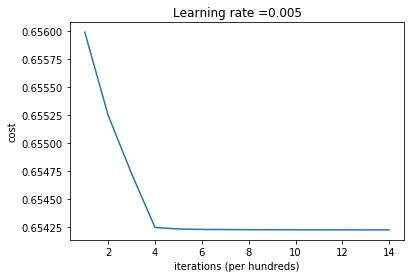

In [56]:
parameters = model(train_set_x, train_set_y, initialization = "random")

## Now i gonna use HE initialization

In [57]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = (np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###
        
    return parameters

Cost after iteration 0: 0.9097925559701854
Cost after iteration 1000: 0.04616030641263418
Cost after iteration 2000: 0.010289666698998737
Cost after iteration 3000: 0.004983332467616768
Cost after iteration 4000: 0.0031087702824747973
Cost after iteration 5000: 0.002205840327557251
Cost after iteration 6000: 0.0016863532243226583
Cost after iteration 7000: 0.0013541053701386055
Cost after iteration 8000: 0.001124489599993336
Cost after iteration 9000: 0.0009571011029239207
Cost after iteration 10000: 0.000830366700123637
Cost after iteration 11000: 0.0007311681503550264
Cost after iteration 12000: 0.0006516611956896309
Cost after iteration 13000: 0.000586637992846164
Cost after iteration 14000: 0.0005326173377988157


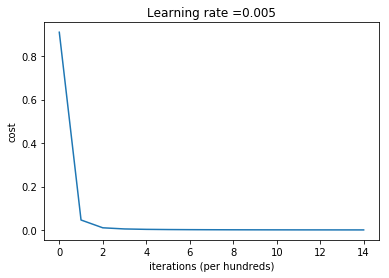

In [59]:
parameters = model(train_set_x, train_set_y, initialization = "he")

In [60]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

In [62]:
print ("On the train set:")
predictions_train = predict(train_set_x, train_set_y, parameters)
print ("On the test set:")
predictions_test = predict(train_set_x, train_set_x, parameters)

On the train set:
Accuracy: 1.0
On the test set:
Accuracy: 0.01
